# Introdução

#  Business Goal

## Contexto do Projeto

Este projeto de análise de dados visa entender o comportamento do mercado imobiliário em Nova Iorque, utilizando técnicas de análise de dados e aprendizado de máquina, como o KMeans para agrupamento de dados. O objetivo é criar um modelo que permita à empresa entender melhor as características dos imóveis e identificar padrões no mercado, segmentando os imóveis em clusters que podem ser analisados de forma mais detalhada para tomada de decisão.

## Objetivos Específicos

1. **Segmentação de Imóveis:**
   - **Meta:** Utilizar a técnica de **KMeans** para agrupar os imóveis em clusters com base em suas características, como preço, número de quartos, área do imóvel, localização, etc.
   - **Objetivo:** Identificar grupos de imóveis com características semelhantes, permitindo uma melhor análise e segmentação do mercado imobiliário, e facilitando a personalização de ofertas para diferentes grupos de consumidores.

2. **Identificação de Padrões no Mercado:**
   - **Meta:** Analisar a correlação entre as características dos imóveis e seus preços, e identificar quais variáveis mais impactam o preço final de venda.
   - **Objetivo:** Oferecer insights sobre os fatores que mais influenciam o preço dos imóveis, ajudando no desenvolvimento de estratégias de preços, bem como oferecendo recomendações sobre quais características valorizar em novos desenvolvimentos imobiliários.

3. **Melhoria da Precisão na Avaliação de Imóveis:**
   - **Meta:** Melhorar a precisão da avaliação de imóveis usando dados históricos de vendas, características dos imóveis e a segmentação obtida pelos clusters.
   - **Objetivo:** Oferecer uma ferramenta mais precisa para corretores de imóveis e investidores ao avaliar novos imóveis, ajudando-os a determinar um preço de venda mais adequado e competitivo com base nas características e no mercado local.

4. **Visualização dos Resultados para Tomada de Decisão:**
   - **Meta:** Criar visualizações interativas e gráficos que permitam aos stakeholders (gestores, investidores, etc.) analisar os dados de forma intuitiva.
   - **Objetivo:** Facilitar a comunicação de resultados e insights para equipes não técnicas, permitindo que tomadores de decisão compreendam rapidamente as tendências do mercado e façam escolhas informadas baseadas nos dados.


#**Referencia do dataset utilizado**
O dataset utilizado está presente no seguinte link: https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market/data



##  Importação de Bibliotecas e Download do Dataset
Neste passo, foram importadas as bibliotecas necessárias para a realização deste algoritmo , como pandas, numpy, matplotlib, seaborn, sklearn, e também a biblioteca `kagglehub` para fazer o download do dataset diretamente do Kaggle.
Após a importação, o dataset é lido em formato CSV com a utilização da biblioteca pandas.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from google.colab import files

import kagglehub

# Caminho do dataset
dataset_path = "nelgiriyewithana/new-york-housing-market"
!kaggle datasets download {dataset_path} -p /content/ --unzip

# Leitura do ficheiro CSV
df_file = pd.read_csv('NY-House-Dataset.csv')
df_data = pd.DataFrame(df_file)

# Exibir as primeiras linhas do dataframe
df_data.head()

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market
License(s): other
100% 271k/271k [00:00<00:00, 829kB/s]
100% 271k/271k [00:00<00:00, 828kB/s]


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


##  Verificação de Valores Ausentes e Duplicados
Antes de começarmos a análise, é importante verificar se o dataset contém valores ausentes ou duplicados.
Primeiro, verificamos se existem valores ausentes (NaN) nas colunas e, em seguida, removemos qualquer linha duplicada para garantir que os resultados sejam precisos.


In [ ]:
# Verificar valores ausentes
print(df_file.isna().sum())

# Verificar e eliminar duplicados
print(f"Número de entradas duplicadas: {df_file.duplicated().sum()}")
df = df_file.drop_duplicates()
print(f"Linhas duplicadas removidas")

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64
Número de entradas duplicadas: 214
Linhas duplicadas removidas


## Seleção das Features e Análise de Correlação
A seguir, selecionamos as colunas que serão usadas na análise. Utilizamos as variáveis como `PRICE`, `BEDS`, `BATH`, `PROPERTYSQFT`, `LATITUDE` e `LONGITUDE` para verificar como essas variáveis estão correlacionadas entre si.
Visualizamos isso com uma matriz de correlação utilizando o Seaborn.

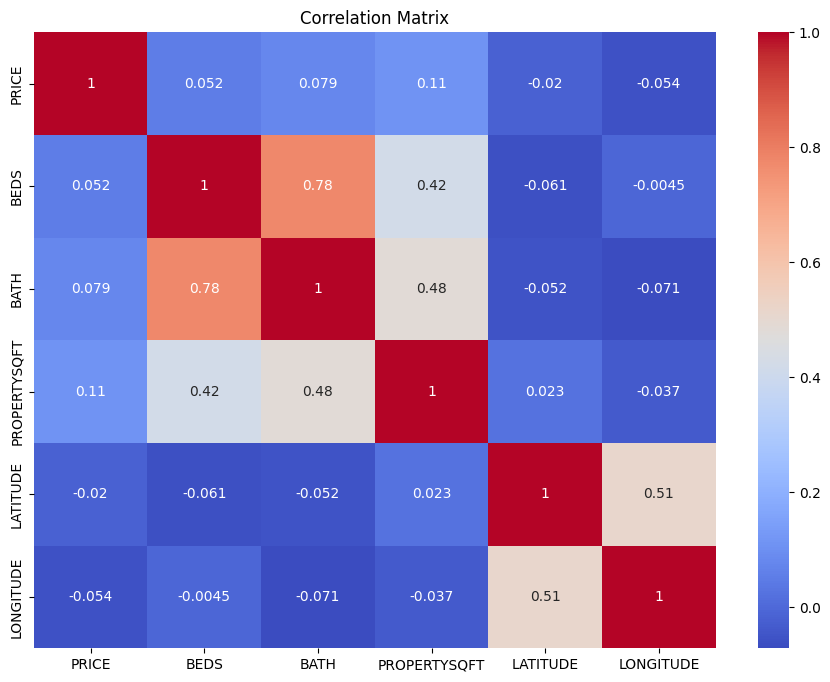

In [ ]:
# Selecionar as features para análise
selected_features = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']

# Analisar correlações entre as features selecionadas
plt.figure(figsize=(11, 8))
sns.heatmap(df_file[selected_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Tratamento de Valores Ausentes e Remoção de Outliers
Neste passo, tratamos os valores ausentes substituindo-os pela mediana de cada coluna. Além disso, identificamos e removemos outliers utilizando o intervalo interquartil (IQR), que define limites para os dados com base nos quartis.


In [ ]:
# Tratar valores ausentes
df_file[selected_features] = df_file[selected_features].fillna(df_file[selected_features].median())

# Remover outliers
Q1 = df_file[selected_features].quantile(0.25)
Q3 = df_file[selected_features].quantile(0.75)
IQR = Q3 - Q1
df_file = df_file[~((df[selected_features] < (Q1 - 1.5 * IQR)) |
          (df_file[selected_features] > (Q3 + 1.5 * IQR))).any(axis=1)]


## Normalização dos Dados
A normalização é um processo importante, especialmente quando utilizamos algoritmos como KMeans, que são sensíveis à escala dos dados. Aqui, utilizamos o `StandardScaler` do Scikit-learn para normalizar as variáveis selecionadas para que tenham média 0 e desvio padrão 1.


In [ ]:
# Normalizar os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[selected_features])


##  Função para Avaliar o KMeans
Nesta função, vamos avaliar o desempenho do algoritmo KMeans para diferentes números de clusters (`k`). Utilizaremos duas métricas: a inércia e o Silhouette Score. A inércia mede a soma das distâncias quadradas dos pontos ao centroide, enquanto o Silhouette Score avalia a separação dos clusters.


In [ ]:
# Função para avaliar KMeans
def evaluate_kmeans(data, max_k=10):
    inertia = []
    silhouette_scores = []
    k_values = range(2, max_k + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    return k_values, inertia, silhouette_scores

# Avaliar para diferentes valores de k
k_values, inertia, silhouette_scores = evaluate_kmeans(scaled_data, max_k=10)


##  Elbow Method
O Elbow Method é utilizado para determinar o número ideal de clusters (`k`). Este método observa a inércia do modelo para diferentes valores de `k` e escolhe o ponto onde a diminuição da inércia começa a ser menos pronunciada (o "cotovelo").


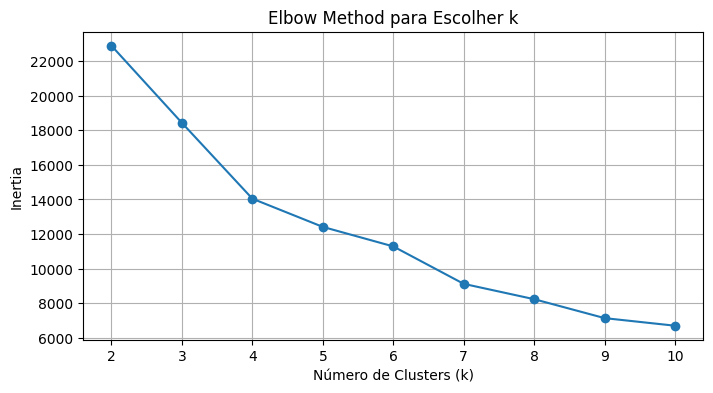

In [ ]:
# Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method para Escolher k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


## Análise do Silhouette Score
Além do Elbow Method, o Silhouette Score é outra métrica que ajuda a escolher o número ideal de clusters. Um valor próximo de 1 indica que os clusters estão bem separados, enquanto valores próximos de 0 ou negativos indicam que os clusters se sobrepõem.


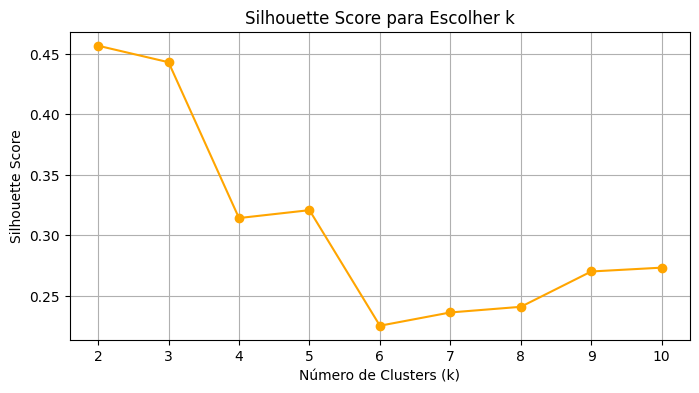

In [ ]:
# Gráfico do Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score para Escolher k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


##  Implementação do KMeans Manual
Neste passo, vamos implementar o algoritmo KMeans de forma manual, sem utilizar a implementação pronta do Scikit-learn. O KMeans tenta agrupar os dados em `k` clusters, ajustando os centroides iterativamente até que a convergência seja alcançada.


In [ ]:
# Função KMeans Manual
def kmeans_manual(data, k, max_iters=100, tol=1e-4):
    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for i in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([data[clusters == j].mean(axis=0) for j in range(k)])

        if np.all(np.abs(new_centroids - centroids) < tol):
            print(f"Convergência alcançada na iteração {i + 1}")
            break

        centroids = new_centroids

    return clusters, centroids

##  Recalcular os Centroides
Após realizar a classificação dos dados nos clusters, precisamos recalcular os centroides de cada cluster com base nos pontos atribuídos a eles. Esse processo é repetido até que os centroides não mudem mais.


In [ ]:
# Função para recalcular os centroides
def recalcular_centroides(data, clusters, k, tol=1e-4):
    """
    Recalcular os centroides dos clusters até a convergência.
    """
    novos_centroides = []
    convergiu = True

    for cluster_id in range(k):
        pontos_cluster = data[clusters == cluster_id]
        if len(pontos_cluster) == 0:
            continue

        novo_centro = pontos_cluster.mean(axis=0)
        novos_centroides.append(novo_centro)

    novos_centroides = np.array(novos_centroides)
    if np.all(np.abs(novos_centroides - centroids) < tol):
        convergiu = True
    else:
        convergiu = False

    return novos_centroides, convergiu

## Aplicação do KMeans Manual e Mapeamento dos Clusters
Agora, aplicamos o KMeans manualmente com o número de clusters escolhido e adicionamos o rótulo de cluster no dataframe. Para cada cluster, damos um nome apropriado.


In [ ]:
# Definir o número ótimo de clusters
optimal_k = 4

# Rodar KMeans Manual
clusters, centroids_scaled = kmeans_manual(scaled_data, optimal_k)

# Adicionar coluna de clusters ao dataframe
df['Cluster'] = clusters

# Mapeamento dos nomes dos clusters
cluster_names = {
    0: "Econômico",
    1: "Luxo",
    2: "Intermediário",
    3: "Compacto Urbano"
}

# Adicionar coluna de nomes dos clusters
df['Cluster_Nome'] = df['Cluster'].map(cluster_names)

# Recalcular os centroides
centroids_original = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids_original, columns=selected_features)
print("Centroides dos Clusters (valores originais):")
print(centroids_df)

Convergência alcançada na iteração 45
Centroides dos Clusters (valores originais):
          PRICE      BEDS      BATH  PROPERTYSQFT   LATITUDE  LONGITUDE
0  2.221662e+06  2.363423  1.847982   1850.201722  40.776304 -73.951296
1  1.119096e+06  3.259317  2.261750   1844.819583  40.607760 -74.039371
2  1.780127e+07  9.588235  7.214113   7277.449107  40.726711 -73.959714
3  8.606580e+05  3.560538  2.243111   1943.830804  40.734176 -73.831614


##  Visualização dos Clusters e Centroides
Agora, vamos visualizar a distribuição


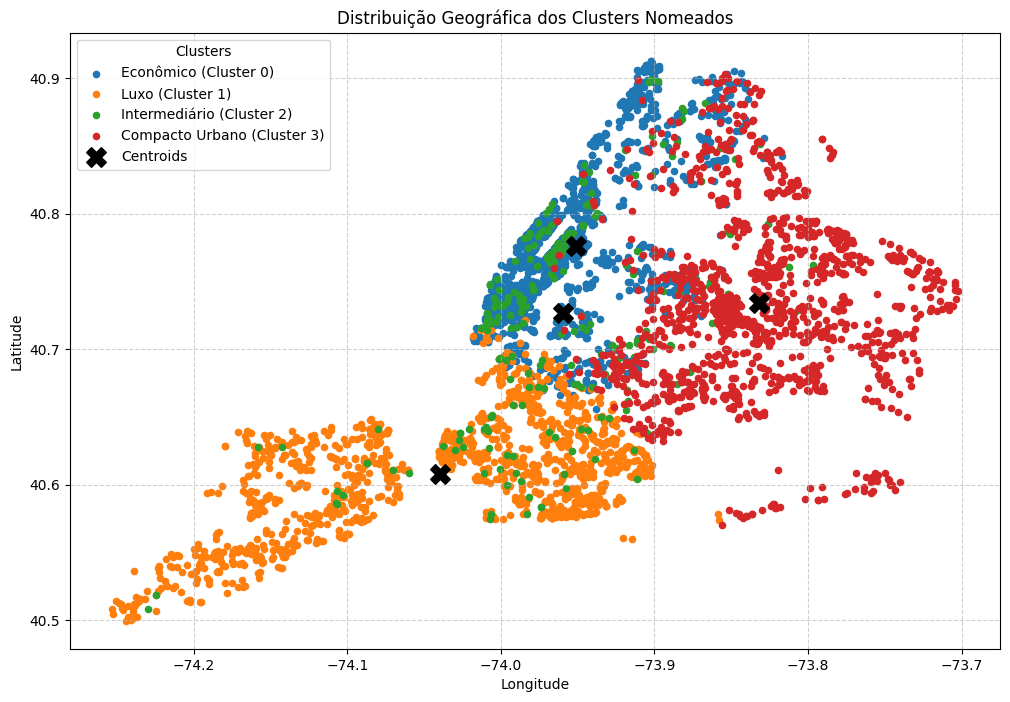

In [ ]:
# Plotando os clusters
plt.figure(figsize=(12, 8))
palette = sns.color_palette("tab10", len(cluster_names))

for cluster_id, cluster_nome in cluster_names.items():
    cluster_points = df[df['Cluster'] == cluster_id]
    plt.scatter(
        cluster_points['LONGITUDE'],
        cluster_points['LATITUDE'],
        s=20,
        color=palette[cluster_id],
        label=f'{cluster_nome} (Cluster {cluster_id})'
    )

plt.scatter(
    centroids_original[:, -1],
    centroids_original[:, -2],
    c='black',
    marker='X',
    s=200,
    label='Centroids'
)

plt.title("Distribuição Geográfica dos Clusters Nomeados")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Clusters")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## Exportar Dados


In [ ]:
# Exportar os resultados
df.to_csv("dados_clusterizados_nomeados.csv", index=False)
print("Resultados exportados com sucesso!")

Resultados exportados com sucesso!


## Visualização dos Clusters e Centroides no mapa
Agora, vamos visualizar a distribuição no mapa da cidade


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Definir cores para cada cluster
cluster_colors = {cluster_id: palette[cluster_id] for cluster_id in cluster_names}

df['Cluster_Color'] = df['Cluster'].map(cluster_colors)

# Criar gráfico de dispersão interativo com Plotly
fig = px.scatter_mapbox(
    df,
    lat="LATITUDE",
    lon="LONGITUDE",
    color='Cluster',
    color_discrete_map=cluster_colors,
    title="Distribuição Geográfica dos Clusters Nomeados",
    hover_data={"Cluster": True, "LATITUDE": True, "LONGITUDE": True,"PRICE": ":.2f",'PROPERTYSQFT': ":.2f"},
    labels={"Cluster": "Cluster", "LATITUDE": "Latitude", "LONGITUDE": "Longitude"}
)

# Ajustando o layout do mapa
fig.update_layout(
    mapbox_style="open-street-map",
    width=1200,
    height=800,
    legend_title="Clusters",
    showlegend=True,
    mapbox=dict(
        zoom=10 # Definindo o nível de zoom inicial (ajuste conforme necessário)
    )
)

# Exibindo o gráfico
fig.show()
